In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /gdrive/MyDrive/AN2DL/
%ls

/gdrive/MyDrive/AN2DL
dataset.zip


In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
%ls


dataset.zip


In [ ]:
!unzip dataset.zip

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
  inflating: training/Tomato/37979.jpg  
  inflating: training/Tomato/37980.jpg  
  inflating: training/Tomato/37982.jpg  
  inflating: training/Tomato/37983.jpg  
  inflating: training/Tomato/37984.jpg  
  inflating: training/Tomato/37985.jpg  
  inflating: training/Tomato/37988.jpg  
  inflating: training/Tomato/37989.jpg  
  inflating: training/Tomato/37990.jpg  
  inflating: training/Tomato/37992.jpg  
  inflating: training/Tomato/37993.jpg  
  inflating: training/Tomato/37994.jpg  
  inflating: training/Tomato/37995.jpg  
  inflating: training/Tomato/37996.jpg  
  inflating: training/Tomato/37997.jpg  
  inflating: training/Tomato/37998.jpg  
  inflating: training/Tomato/37999.jpg  
  inflating: training/Tomato/38000.jpg  
  inflating: training/Tomato/38001.jpg  
  inflating: training/Tomato/38003.jpg  
  inflating: training/Tomato/38004.jpg  
  inflating: training/Tomato/38005.jpg  
  inflating: training/Tomato/38006.jpg  
  

In [ ]:
dataset_dir = 'training'


In [ ]:
#!pip install split-folders
#splitfolders --ratio .8 .2 -- training

In [ ]:
# Plot example images from dataset
labels = ['Apple','Blueberry','Cherry','Corn','Grape','Orange','Peach','Pepper','Potato','Raspberry','Soybean','Squash','Strawberry','Tomato']

num_row = len(labels)//2
num_col = len(labels)//num_row
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_row,15*num_col))
for i in range(len(labels)):
  if i < len(labels):
    class_imgs = next(os.walk('{}/{}/'.format(dataset_dir, labels[i])))[2]
    class_img = class_imgs[0]
    img = Image.open('{}/{}/{}'.format(dataset_dir, labels[i], class_img))
    ax = axes[i//num_col, i%num_col]
    ax.imshow(np.array(img))
    ax.set_title('{}'.format(labels[i]))
plt.tight_layout()
plt.show()

Let the game begin

In [ ]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)


2.7.0


In [ ]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [ ]:
#I create a validation set on my own , moving 20% images from each folder.

In [ ]:
%cd /gdrive/MyDrive/AN2DL/training
%ls

/gdrive/MyDrive/AN2DL/training
Apple/      Cherry/  Grape/   Peach/   Potato/     Soybean/  Strawberry/
Blueberry/  Corn/    Orange/  Pepper/  Raspberry/  Squash/   Tomato/


In [ ]:
%cd /gdrive/MyDrive/AN2DL/
%mkdir validation/

/gdrive/MyDrive/AN2DL


In [ ]:
%cd /gdrive/MyDrive/AN2DL/
%ls

/gdrive/MyDrive/AN2DL
dataset.zip  training/  validation/


In [ ]:
%cd /gdrive/MyDrive/AN2DL/training/Apple

/gdrive/MyDrive/AN2DL/training/Apple


In [ ]:
%cd /gdrive/MyDrive/AN2DL/validation
%ls

/gdrive/MyDrive/AN2DL/validation


In [ ]:
%cd /gdrive/MyDrive/AN2DL/training/Apple
%mkdir /gdrive/MyDrive/AN2DL/validation/Apple
!find . -maxdepth 1 -type f |head -200|xargs mv -t "/gdrive/MyDrive/AN2DL/validation/Apple"
%cd /gdrive/MyDrive/AN2DL/training/Blueberry
%mkdir /gdrive/MyDrive/AN2DL/validation/Blueberry
!find . -maxdepth 1 -type f |head -80|xargs mv -t "/gdrive/MyDrive/AN2DL/validation/Blueberry"
%cd /gdrive/MyDrive/AN2DL/training/Cherry
%mkdir /gdrive/MyDrive/AN2DL/validation/Cherry
!find . -maxdepth 1 -type f |head -120|xargs mv -t "/gdrive/MyDrive/AN2DL/validation/Cherry"
%cd /gdrive/MyDrive/AN2DL/training/Corn
%mkdir /gdrive/MyDrive/AN2DL/validation/Corn
!find . -maxdepth 1 -type f |head -240|xargs mv -t "/gdrive/MyDrive/AN2DL/validation/Corn"
%cd /gdrive/MyDrive/AN2DL/training/Peach
%mkdir /gdrive/MyDrive/AN2DL/validation/Peach
!find . -maxdepth 1 -type f |head -200|xargs mv -t "/gdrive/MyDrive/AN2DL/validation/Peach"
%cd /gdrive/MyDrive/AN2DL/training/Pepper
%mkdir /gdrive/MyDrive/AN2DL/validation/Pepper
!find . -maxdepth 1 -type f |head -140|xargs mv -t "/gdrive/MyDrive/AN2DL/validation/Pepper"
%cd /gdrive/MyDrive/AN2DL/training/Potato
%mkdir /gdrive/MyDrive/AN2DL/validation/Potato
!find . -maxdepth 1 -type f |head -140|xargs mv -t "/gdrive/MyDrive/AN2DL/validation/Potato"
%cd /gdrive/MyDrive/AN2DL/training/Grape
%mkdir /gdrive/MyDrive/AN2DL/validation/Grape
!find . -maxdepth 1 -type f |head -280|xargs mv -t "/gdrive/MyDrive/AN2DL/validation/Grape"
%cd /gdrive/MyDrive/AN2DL/training/Orange
%mkdir /gdrive/MyDrive/AN2DL/validation/Orange
!find . -maxdepth 1 -type f |head -340|xargs mv -t "/gdrive/MyDrive/AN2DL/validation/Orange"
%cd /gdrive/MyDrive/AN2DL/training/Raspberry
%mkdir /gdrive/MyDrive/AN2DL/validation/Raspberry
!find . -maxdepth 1 -type f |head -50|xargs mv -t "/gdrive/MyDrive/AN2DL/validation/Raspberry"
%cd /gdrive/MyDrive/AN2DL/training/Soybean
%mkdir /gdrive/MyDrive/AN2DL/validation/Soybean
!find . -maxdepth 1 -type f |head -320|xargs mv -t "/gdrive/MyDrive/AN2DL/validation/Soybean"
%cd /gdrive/MyDrive/AN2DL/training/Squash
%mkdir /gdrive/MyDrive/AN2DL/validation/Squash
!find . -maxdepth 1 -type f |head -110|xargs mv -t "/gdrive/MyDrive/AN2DL/validation/Squash"
%cd /gdrive/MyDrive/AN2DL/training/Strawberry
%mkdir /gdrive/MyDrive/AN2DL/validation/Strawberry
!find . -maxdepth 1 -type f |head -130|xargs mv -t "/gdrive/MyDrive/AN2DL/validation/Strawberry"
%cd /gdrive/MyDrive/AN2DL/training/Tomato
%mkdir /gdrive/MyDrive/AN2DL/validation/Tomato
!find . -maxdepth 1 -type f |head -1130|xargs mv -t "/gdrive/MyDrive/AN2DL/validation/Tomato"

/gdrive/MyDrive/AN2DL/training/Apple
/gdrive/MyDrive/AN2DL/training/Blueberry
/gdrive/MyDrive/AN2DL/training/Cherry
/gdrive/MyDrive/AN2DL/training/Corn
/gdrive/MyDrive/AN2DL/training/Peach
/gdrive/MyDrive/AN2DL/training/Pepper
/gdrive/MyDrive/AN2DL/training/Potato
/gdrive/MyDrive/AN2DL/training/Grape
/gdrive/MyDrive/AN2DL/training/Orange
/gdrive/MyDrive/AN2DL/training/Raspberry
/gdrive/MyDrive/AN2DL/training/Soybean
/gdrive/MyDrive/AN2DL/training/Squash
/gdrive/MyDrive/AN2DL/training/Strawberry
/gdrive/MyDrive/AN2DL/training/Tomato


In [ ]:
%cd /gdrive/My Drive/AN2DL/validation
%ls
%cd /gdrive/My Drive/AN2DL


/gdrive/My Drive/AN2DL/validation
Apple/      Cherry/  Grape/   Peach/   Potato/     Soybean/  Strawberry/
Blueberry/  Corn/    Orange/  Pepper/  Raspberry/  Squash/   Tomato/
/gdrive/My Drive/AN2DL


In [ ]:
# Plot example images from validation
validation_dir='validation'
labels = ['Apple','Blueberry','Cherry','Corn','Grape','Orange','Peach','Pepper','Potato','Raspberry','Soybean','Squash','Strawberry','Tomato']

num_row = len(labels)//2
num_col = len(labels)//num_row
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_row,15*num_col))
for i in range(len(labels)):
  if i < len(labels):
    class_imgs = next(os.walk('{}/{}/'.format(validation_dir, labels[i])))[2]
    class_img = class_imgs[0]
    img = Image.open('{}/{}/{}'.format(validation_dir, labels[i], class_img))
    ax = axes[i//num_col, i%num_col]
    ax.imshow(np.array(img))
    ax.set_title('{}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [ ]:
train_data_gen = ImageDataGenerator()
train_gen = train_data_gen.flow_from_directory(directory='/gdrive/My Drive/AN2DL/training',
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               classes=None, # can be set to labels
                                               class_mode='categorical',
                                               batch_size=8,
                                               shuffle=True,
                                               seed=seed)

Found 14248 images belonging to 14 classes.


In [ ]:
valid_data_gen = ImageDataGenerator()
valid_gen = train_data_gen.flow_from_directory(directory='/gdrive/My Drive/AN2DL/validation',
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               classes=None, # can be set to labels
                                               class_mode='categorical',
                                               batch_size=8,
                                               shuffle=False,
                                               seed=seed)

Found 3480 images belonging to 14 classes.


In [ ]:
print("Assigned labels")
print(train_gen.class_indices)
print()
print("Target classes")
print(train_gen.classes)

Assigned labels
{'Apple': 0, 'Blueberry': 1, 'Cherry': 2, 'Corn': 3, 'Grape': 4, 'Orange': 5, 'Peach': 6, 'Pepper': 7, 'Potato': 8, 'Raspberry': 9, 'Soybean': 10, 'Squash': 11, 'Strawberry': 12, 'Tomato': 13}

Target classes
[ 0  0  0 ... 13 13 13]


In [ ]:
def get_next_batch(generator):
  batch = next(generator)

  image = batch[0]
  target = batch[1]

  print("(Input) image shape:", image.shape)
  print("Target shape:",target.shape)

  # Visualize only the first sample
  image = image[0]
  target = target[0]
  target_idx = np.argmax(target)
  print()
  print("Categorical label:", target)
  print("Label:", target_idx)
  print("Class name:", labels[target_idx])
  fig = plt.figure(figsize=(6, 4))
  plt.imshow(np.uint8(image))

  return batch

(Input) image shape: (8, 256, 256, 3)
Target shape: (8, 14)

Categorical label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Label: 1
Class name: Blueberry


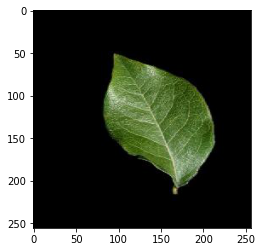

In [ ]:
# Get a sample from dataset and show info
_ = get_next_batch(train_gen)

In [ ]:
# Create an instance of ImageDataGenerator with Data Augmentation
aug_train_data_gen = ImageDataGenerator(rotation_range=40,
                                        height_shift_range=60,
                                        width_shift_range=60,
                                        zoom_range=0.4, #+10 the values
                                        horizontal_flip=True,
                                        vertical_flip=True,
                                        fill_mode='reflect',
                                        rescale=1/255.) # rescale value is multiplied to the image

# Obtain a data generator with the 'ImageDataGenerator.flow_from_directory' method
aug_train_gen = aug_train_data_gen.flow_from_directory(directory='training',
                                                       target_size=(256,256),
                                                       color_mode='rgb',
                                                       classes=None, # can be set to labels
                                                       class_mode='categorical',
                                                       batch_size=8,
                                                       shuffle=True,
                                                       seed=seed)

Found 14248 images belonging to 14 classes.


In [ ]:
input_shape = (256, 256, 3)


In [ ]:
# Download and plot the VGG16 model
supernet = tfk.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3)
)
supernet.summary()
#tfk.utils.plot_model(supernet)

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

In [ ]:
supernet.trainable = False

def build_model(input_shape):
  inputs = tfk.Input(shape=(256,256,3))#32
  #x = tfkl.Resizing(256, 256, interpolation="bicubic")(inputs)#64
  x = supernet(inputs)
  x = tfkl.Flatten(name='Flatten')(x)
  x= tfkl.Dropout(0.3, seed=seed)(x)
  x = tfkl.Dense(units=512, name='Classifier', kernel_initializer=tfk.initializers.GlorotUniform(seed), activation='relu')(x)
  x = tfkl.Dropout(0.3, seed=seed)(x)

  outputs = tfkl.Dense(
    14, #20
    activation='softmax',
    kernel_initializer = tfk.initializers.GlorotUniform(seed))(x)


# Connect input and output through the Model class
  model = tfk.Model(inputs=inputs, outputs=outputs, name='tl_model')

# Compile the model
  model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')
  #model.summary()
  return model


"""  x = tfkl.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(x)
  x = tfkl.AveragePooling2D(
        pool_size = (2, 2)
    )(x)

  x = tfkl.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(x)
  x = tfkl.AveragePooling2D(
        pool_size = (2, 2)
    )(x)
  x = tfkl.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(x)
  x = tfkl.AveragePooling2D(
        pool_size = (2, 2)
    )(x)"""

"  x = tfkl.Conv2D(\n        filters=32,\n        kernel_size=(3, 3),\n        strides = (1, 1),\n        padding = 'same',\n        activation = 'relu',\n        kernel_initializer = tfk.initializers.GlorotUniform(seed)\n    )(x)\n  x = tfkl.AveragePooling2D(\n        pool_size = (2, 2)\n    )(x)\n\n  x = tfkl.Conv2D(\n        filters=64,\n        kernel_size=(3, 3),\n        strides = (1, 1),\n        padding = 'same',\n        activation = 'relu',\n        kernel_initializer = tfk.initializers.GlorotUniform(seed)\n    )(x)\n  x = tfkl.AveragePooling2D(\n        pool_size = (2, 2)\n    )(x)\n  x = tfkl.Conv2D(\n        filters=128,\n        kernel_size=(3, 3),\n        strides = (1, 1),\n        padding = 'same',\n        activation = 'relu',\n        kernel_initializer = tfk.initializers.GlorotUniform(seed)\n    )(x)\n  x = tfkl.AveragePooling2D(\n        pool_size = (2, 2)\n    )(x)"

In [ ]:
%cd /gdrive/MyDrive/AN2DL/
%ls

/gdrive/MyDrive/AN2DL
dataset.zip  training/  validation/


In [ ]:
patience = 10
early_stopping = tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='min', patience=patience, restore_best_weights=True)
earlystopping_model = build_model(input_shape)
#earlystopping_model.summary()
earlystopping_history = earlystopping_model.fit(
    aug_train_gen,
    validation_data=valid_gen,
    batch_size = 32,
    epochs = 15,
    callbacks=[early_stopping]
).history


Epoch 1/15
1781/1781 [==============================] - 415s 226ms/step - loss: 1.2906 - accuracy: 0.6131 - val_loss: 34.9260 - val_accuracy: 0.3784
Epoch 2/15
1781/1781 [==============================] - 403s 226ms/step - loss: 0.8914 - accuracy: 0.7096 - val_loss: 37.7268 - val_accuracy: 0.4046
Epoch 3/15
1781/1781 [==============================] - 395s 221ms/step - loss: 0.8195 - accuracy: 0.7374 - val_loss: 40.8853 - val_accuracy: 0.4284
Epoch 4/15
1781/1781 [==============================] - 390s 219ms/step - loss: 0.7671 - accuracy: 0.7543 - val_loss: 50.0862 - val_accuracy: 0.3681
Epoch 5/15
1781/1781 [==============================] - 385s 216ms/step - loss: 0.7180 - accuracy: 0.7687 - val_loss: 53.6864 - val_accuracy: 0.3626
Epoch 6/15
1781/1781 [==============================] - 388s 218ms/step - loss: 0.6935 - accuracy: 0.7750 - val_loss: 53.0161 - val_accuracy: 0.3951
Epoch 7/15
1781/1781 [==============================] - 387s 217ms/step - loss: 0.6738 - accuracy: 0.7849 

In [ ]:
# Save the best model
earlystopping_model.save('KingOtto16')

INFO:tensorflow:Assets written to: KingOtto16/assets


In [ ]:
ft_model = tfk.models.load_model('KingOtto16')
# Freeze first 14 vgg16 layers
for i, layer in enumerate(ft_model.get_layer('vgg16').layers[:14]):
  layer.trainable=False
for i, layer in enumerate(ft_model.get_layer('vgg16').layers[14:]):
  layer.trainable=True
for layer in ft_model.layers:
   print( layer.name, layer.trainable)

ft_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(1e-4), metrics='accuracy')

input_2 True
vgg16 False
Flatten True
dropout True
Classifier True
dropout_1 True
dense True


In [ ]:
for i, layer in enumerate(ft_model.get_layer('vgg16').layers):
  print( layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
# Fine-tune the model
ft_history = ft_model.fit(
    aug_train_gen,
    batch_size = 32,
    epochs = 15,
    validation_data = valid_gen,
    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True)]
).history


Epoch 1/15
1781/1781 [==============================] - 388s 217ms/step - loss: 0.5536 - accuracy: 0.8214 - val_loss: 50.8542 - val_accuracy: 0.4089
Epoch 2/15
1781/1781 [==============================] - 390s 219ms/step - loss: 0.5482 - accuracy: 0.8252 - val_loss: 50.4608 - val_accuracy: 0.4006
Epoch 3/15
1781/1781 [==============================] - 392s 220ms/step - loss: 0.5280 - accuracy: 0.8276 - val_loss: 48.9201 - val_accuracy: 0.4124
Epoch 4/15
1781/1781 [==============================] - 390s 219ms/step - loss: 0.4999 - accuracy: 0.8375 - val_loss: 47.4666 - val_accuracy: 0.4170
Epoch 5/15
1781/1781 [==============================] - 388s 218ms/step - loss: 0.5097 - accuracy: 0.8390 - val_loss: 51.9776 - val_accuracy: 0.4095
Epoch 6/15
1781/1781 [==============================] - 390s 219ms/step - loss: 0.4905 - accuracy: 0.8417 - val_loss: 46.2994 - val_accuracy: 0.4250
Epoch 7/15
1781/1781 [==============================] - 387s 217ms/step - loss: 0.4889 - accuracy: 0.8406 

In [ ]:
ft_model.save('KingOtto16Final')

INFO:tensorflow:Assets written to: KingOtto16Final/assets


In [ ]:
%ls

dataset.zip  KingOtto16/  KingOtto16Final/  training/  validation/


In [ ]:
print("all well")

all well
